In [1]:

import os
import scanpy as sc
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from traj_dwt import run_conserved_sample_fitting_pipeline, calculate_trajectory_conservation

# Set matplotlib style
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")


/home/gilberthan/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
DATA_PATH = "../../../processed_data/integrated_data/20250414_epi_adata.h5ad"  # Path to the AnnData object
OUTPUT_DIR = "/home/gilberthan/Desktop/disk2/202409_tooth/process/trajectory/20250414_epi_run"

In [3]:
from traj_dwt import anndata_to_3d_matrix

In [4]:
epi = sc.read_h5ad("../../../processed_data/integrated_data/20250414_epi_adata.h5ad")
pseudotime_key = "pseudo"
batch_key = "Sample"
genes_to_use = ["Chst10","Map2","Tfap2b","Ankrd44","Slco5a1"]

In [5]:
epi

AnnData object with n_obs × n_vars = 49805 × 27293
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'nCount_RNA', 'nFeature_RNA', 'coarse_anno_1', 'total_counts', 'log10_total_counts', 'n_genes_detected', 'mito_frac', 'ribo_frac', 'compl', 'size_factors', 'Sample', 'Project', 'Core_datasets', 'Mandibular_Maxillary', 'Molar_Incisor', 'Tooth.position', 'Histology', 'Sex', 'Gene.Type', 'Knockout_gene', 'Cre', 'Treatment', 'FACs', 'Age', 'Stage', 'Development.stage', 'Disease', 'Strain', 'Dissociation_enzyme', 'Machine', 'Species', 'Related.assay', 'Journal', 'Data.Source', 'Data.location', 'new_totals_log', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'scDblFinder_class', 'leiden', 'anno_level_1', 'Cell_ID', 'index', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'leiden_clusters_level_3', 'leiden_clusters_level_4', 

In [6]:
epi.X[0:5,0:4].toarray()

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 2., 1.]])

In [7]:
results = run_conserved_sample_fitting_pipeline(
            adata=epi,
            output_dir=OUTPUT_DIR,
            pseudotime_key=pseudotime_key,
            n_bins=100,  # Number of pseudotime bins
            batch_key=batch_key,
            genes_to_use=genes_to_use,
            n_top_genes=5,  # Number of top conserved genes to analyze
            n_samples_per_gene=None,  # Use default fraction
            conservation_fraction=0.5,  # Fraction of samples to use per gene
            filter_samples_by_variation=True,
            variation_threshold=0.1,
            variation_metric='max',
            normalize='zscore',  # How to normalize gene expression
            dtw_radius=10,  # Radius for DTW calculation
            use_fastdtw=True,  # Use faster DTW implementation
            max_genes_to_plot=5,  # Maximum number of genes to visualize
            top_genes_only=True,  # Only fit models for top conserved genes
            prefix='epithelial_conservation'  # Prefix for output files
        )

2025-04-14 21:03:02,886 - traj_dwt.utils - INFO - Found 27 batches in data
2025-04-14 21:03:02,890 - traj_dwt.utils - WARNING - Batch ToothNc_Junjun_E13.5 has insufficient coverage (0.15 < 0.3), skipping
2025-04-14 21:03:02,893 - traj_dwt.utils - WARNING - Batch ToothNc_Junjun_E14.5 has insufficient coverage (0.19 < 0.3), skipping
2025-04-14 21:03:02,895 - traj_dwt.utils - WARNING - Batch ToothNc_Junjun_E16.5 has insufficient coverage (0.18 < 0.3), skipping
2025-04-14 21:03:02,899 - traj_dwt.utils - WARNING - Batch ToothNc_Junjun_P7.5 has insufficient coverage (0.29 < 0.3), skipping
2025-04-14 21:03:02,901 - traj_dwt.utils - WARNING - Batch ToothNiche_Hong_E12.5 has insufficient coverage (0.15 < 0.3), skipping
2025-04-14 21:03:02,904 - traj_dwt.utils - WARNING - Batch ToothNiche_Hong_E14.5 has insufficient coverage (0.29 < 0.3), skipping
2025-04-14 21:03:02,906 - traj_dwt.utils - WARNING - Batch ToothNiche_Hong_E16.5 has insufficient coverage (0.23 < 0.3), skipping
2025-04-14 21:03:02,

Converting AnnData (shape: (49805, 27293)) to 3D matrix...
3D matrix shape: (3, 100, 5) (batches, timepoints, genes)
Preprocessing data to handle NaN values...
Found 830/1500 NaN values in data (55.3%)
Success: All NaN values have been interpolated in 15 trajectories.
Preprocessing complete: NaN values handled using linear interpolation.
Calculating pairwise distances and conservation scores for 5 genes...


/home/gilberthan/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/home/gilberthan/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/home/gilberthan/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/home/gilberthan/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
2025-04-14 21:03:05,660 - traj_dwt.conservation - INFO - Completed trajectory conservation calculati

Top 5 conserved genes: Tfap2b, Chst10, Slco5a1, Map2, Ankrd44...
Fitting trajectories for 5 genes using most conserved samples...
Fitting trajectories with standard approach...
Fitting trajectories with DTW optimization...
Visualizing fitting results...


KeyError: 0

In [8]:
data_3d, meta, gene_names = anndata_to_3d_matrix(
        epi,
        time_col=pseudotime_key,
        n_timepoints=100,
        batch_col=batch_key,
        gene_names=genes_to_use,
        layer="logcounts",
        tail_width=0.4
    )

2025-04-14 21:03:24,334 - traj_dwt.utils - INFO - Found 27 batches in data
2025-04-14 21:03:24,340 - traj_dwt.utils - WARNING - Batch ToothNc_Junjun_E13.5 has insufficient coverage (0.15 < 0.3), skipping
2025-04-14 21:03:24,345 - traj_dwt.utils - WARNING - Batch ToothNc_Junjun_E14.5 has insufficient coverage (0.19 < 0.3), skipping
2025-04-14 21:03:24,349 - traj_dwt.utils - WARNING - Batch ToothNc_Junjun_E16.5 has insufficient coverage (0.18 < 0.3), skipping
2025-04-14 21:03:24,358 - traj_dwt.utils - WARNING - Batch ToothNc_Junjun_P7.5 has insufficient coverage (0.29 < 0.3), skipping
2025-04-14 21:03:24,363 - traj_dwt.utils - WARNING - Batch ToothNiche_Hong_E12.5 has insufficient coverage (0.15 < 0.3), skipping
2025-04-14 21:03:24,368 - traj_dwt.utils - WARNING - Batch ToothNiche_Hong_E14.5 has insufficient coverage (0.29 < 0.3), skipping
2025-04-14 21:03:24,374 - traj_dwt.utils - WARNING - Batch ToothNiche_Hong_E16.5 has insufficient coverage (0.23 < 0.3), skipping
2025-04-14 21:03:24,

In [9]:
if data_3d.shape[0] == 0:
    raise ValueError("No valid batches found in the data.")

reshaped_data_shape = data_3d.shape
print(f"3D matrix shape: {reshaped_data_shape} (batches, timepoints, genes)")

# Extract time points from meta
time_points = meta.get('time_bins', np.linspace(0, 1, 100))

# Step 2: Calculate conservation scores
print(f"Calculating pairwise distances and conservation scores for {data_3d.shape[2]} genes...")
conservation_results = calculate_trajectory_conservation(
    data_3d,
    distance_metric='dtw',
    save_dir=OUTPUT_DIR,
    prefix= "epithelial_conservation",
    dtw_radius=3,
    use_fastdtw=True,
    normalize='zscore',
    filter_samples_by_variation=True,
    variation_threshold=0.01,
    variation_metric='max',
    gene_names=gene_names,
    process_nan=True
)

2025-04-14 20:59:42,468 - traj_dwt.conservation - INFO - Calculating trajectory conservation for 5 genes across 4 batches
/home/gilberthan/Desktop/disk2/202409_tooth/script/trajectory_model/traj_dwt_package/src/traj_dwt/conservation.py:196: RuntimeWarning: Mean of empty slice
  'mean_distance': np.nanmean(distances) if len(distances) > 0 else np.nan
2025-04-14 20:59:42,472 - traj_dwt.conservation - INFO - Completed trajectory conservation calculation for 5 genes


3D matrix shape: (4, 100, 5) (batches, timepoints, genes)
Calculating pairwise distances and conservation scores for 5 genes...


In [11]:
conservation_results

{'conservation_scores': array([nan, nan, nan, nan, nan]),
 'normalized_scores': array([0., 0., 0., 0., 0.]),
 'mean_distances': array([nan, nan, nan, nan, nan]),
 'distance_matrices': [array([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
  array([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
  array([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
  array([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
  array([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]])],
 'pairwise_distances': {'Chst10': array([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
  'Map2': array([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
  'Tfa

In [22]:
data_3d.shape

(14, 100, 5)

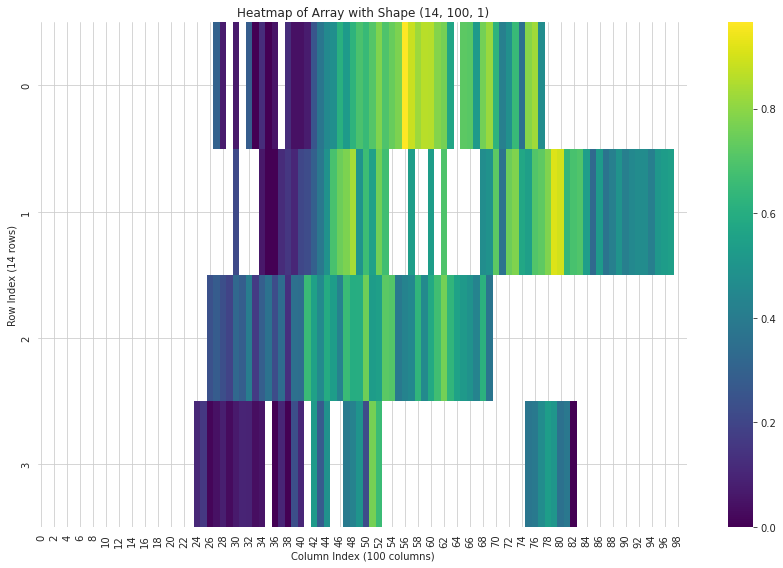

Array shape: (4, 100)
Min value: nan
Max value: nan
Mean value: nan


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create sample data with shape (14, 100, 1)
# You can replace this with your actual data
data = data_3d[0:4,0:100,3]

# Reshape the data to 2D since the third dimension is 1
# This will give us a 2D array of shape (14, 100)
data_2d = data.reshape(4, 100)

# Create a figure with a larger size for better visibility
plt.figure(figsize=(12, 8))

# Create the heatmap using seaborn
# 'cmap' determines the color scheme - you can try different options like 'viridis', 'plasma', 'Blues', etc.
sns.heatmap(data_2d, cmap='viridis', cbar=True)

# Add title and labels
plt.title('Heatmap of Array with Shape (14, 100, 1)')
plt.xlabel('Column Index (100 columns)')
plt.ylabel('Row Index (14 rows)')

# Save the figure (optional)


# Show the plot
plt.tight_layout()
plt.show()

# If you want to see specific values in your array, you can print some statistics
print(f"Array shape: {data.shape}")
print(f"Min value: {data.min()}")
print(f"Max value: {data.max()}")
print(f"Mean value: {data.mean()}") 

In [11]:

interpolation_method = 'linear'
n_bins=100

if data_3d.shape[0] == 0:
    raise ValueError("No valid batches found in the data.")

reshaped_data_shape = data_3d.shape
print(f"3D matrix shape: {reshaped_data_shape} (batches, timepoints, genes)")

# NEW: Step 1.5 - Preprocess NaN values if requested
if True:
    print("Preprocessing data to handle NaN values...")
    # Diagnose NaN patterns
    total_nan = np.isnan(data_3d).sum()
    total_elements = data_3d.size
    nan_percent = (total_nan / total_elements) * 100
    print(f"Found {total_nan}/{total_elements} NaN values in data ({nan_percent:.1f}%)")
    
    if total_nan > 0:
        from traj_dwt import interpolate_missing_values
        
        # Create a processed copy of the data
        data_3d_processed = data_3d.copy()
        
        # Track interpolation statistics
        interpolated_trajectories = 0
        all_nan_trajectories = 0
        
        # Process each batch and gene
        for b in range(data_3d.shape[0]):  # For each batch
            for g in range(data_3d.shape[2]):  # For each gene
                # Get the trajectory for this batch and gene
                trajectory = data_3d[b, :, g]
                nan_count = np.isnan(trajectory).sum()
                
                # Only process if there are NaNs and not all values are NaN
                if nan_count > 0 and nan_count < len(trajectory):
                    # Interpolate missing values
                    data_3d_processed[b, :, g] = interpolate_missing_values(
                        trajectory, method=interpolation_method
                    )
                    interpolated_trajectories += 1
                elif nan_count == len(trajectory):
                    all_nan_trajectories += 1
        
        if all_nan_trajectories > 0:
            print(f"Warning: {all_nan_trajectories} trajectories have all NaN values and cannot be interpolated")
        
        # Check if any NaNs remain
        remaining_nan = np.isnan(data_3d_processed).sum()
        if remaining_nan > 0:
            print(f"Warning: {remaining_nan} NaN values remain after interpolation. These will be filled with zeros.")
            data_3d_processed = np.nan_to_num(data_3d_processed)
        else:
            print(f"Success: All NaN values have been interpolated in {interpolated_trajectories} trajectories.")
            
        # Use the processed data for further calculations
        data_3d = data_3d_processed
        print(f"Preprocessing complete: NaN values handled using {interpolation_method} interpolation.")
    else:
        print("No NaN values found in the data. Skipping preprocessing.")

# Extract time points from meta
time_points = meta.get('time_bins', np.linspace(0, 1, n_bins))

# Step 2: Calculate conservation scores
print(f"Calculating pairwise distances and conservation scores for {data_3d.shape[2]} genes...")
conservation_results = calculate_trajectory_conservation(
    data_3d,
    distance_metric='dtw',
    n_jobs=4,  # Use parallel processing
    gene_names=gene_names
)


2025-04-14 21:06:22,587 - traj_dwt.conservation - INFO - Calculating trajectory conservation for 5 genes across 4 batches
2025-04-14 21:06:22,603 - traj_dwt.conservation - INFO - Completed trajectory conservation calculation for 5 genes


3D matrix shape: (4, 100, 5) (batches, timepoints, genes)
Preprocessing data to handle NaN values...
Found 1110/2000 NaN values in data (55.5%)
Success: All NaN values have been interpolated in 20 trajectories.
Preprocessing complete: NaN values handled using linear interpolation.
Calculating pairwise distances and conservation scores for 5 genes...


In [14]:
data_3d

array([[[0.        , 0.2501551 , 0.        , 0.29954066, 0.16348865],
        [0.        , 0.2501551 , 0.        , 0.29954066, 0.16348865],
        [0.        , 0.2501551 , 0.        , 0.29954066, 0.16348865],
        ...,
        [0.        , 0.        , 0.        , 0.47074379, 0.        ],
        [0.        , 0.        , 0.        , 0.47074379, 0.        ],
        [0.        , 0.        , 0.        , 0.47074379, 0.        ]],

       [[0.        , 0.22172017, 0.        , 0.21572177, 0.        ],
        [0.        , 0.22172017, 0.        , 0.21572177, 0.        ],
        [0.        , 0.22172017, 0.        , 0.21572177, 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.53901475, 0.        ],
        [0.        , 0.        , 0.        , 0.53901475, 0.        ],
        [0.        , 0.        , 0.        , 0.53901475, 0.        ]],

       [[0.        , 0.13343987, 0.        , 0.24013257, 0.        ],
        [0.        , 0.13343987, 0.        , 0.24013257, 0. 

In [13]:
conservation_results["pairwise_distances"]

{'Chst10': array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 'Map2': array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 'Tfap2b': array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 'Ankrd44': array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 'Slco5a1': array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])}